In [1]:
from atom import ATOMClassifier
from sklearn.decomposition import PCA
import sys
import os
from pathlib import Path
import pandas as pd
import joblib
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
import func_classes


In [2]:
# Get the working directory
input_path = Path.cwd()
root = input_path.parent
data_path = root / "data" / "dev_set_final.csv"
train_df = pd.read_csv(data_path, header=0)
train_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,-0.102865,0.685403,-0.126342,-0.093143,-0.247408,-0.520330,-0.111809,-0.110824,-0.601156,...,-0.033643,0.947093,-0.109331,-0.009327,0.347352,-0.325847,0.025891,-0.029405,0.004476,0.022014
1,1,0.746094,-0.576609,0.735505,0.774476,-0.025271,0.703912,0.599209,0.768669,-0.031792,...,0.722444,-0.377326,0.685936,0.767430,0.397196,1.322918,1.068668,1.111849,0.287952,0.550844
2,1,1.256510,-1.506800,1.343951,1.402888,1.171520,2.867781,2.342558,2.323853,1.809249,...,1.894644,-0.918023,2.172439,2.537705,0.860748,2.538150,1.880300,1.844805,2.648266,1.934709
3,1,3.660156,0.875068,3.466356,5.180011,0.712979,1.540197,2.216439,3.149202,0.020231,...,3.265162,0.886628,3.064834,4.770601,0.512461,1.075185,1.212758,1.881834,0.044759,0.029518
4,1,-0.087240,0.660018,0.000358,-0.102518,0.682410,1.363083,1.075550,0.732167,0.953757,...,0.092076,0.572674,0.217552,0.088420,1.462617,1.805552,1.566229,0.516903,0.866841,2.204878


In [3]:
# Load test data
test_df = pd.read_csv(root/'data'/'eval_set_final.csv', header=0)

Processing fold: 0
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (329, 31)
Train set size: 264
Test set size: 65
-------------------------------------
Memory: 81.72 kB
Scaled: False
Outlier values: 104 (1.3%)


Training ========================= >>
Models: LGB, LDA, LR, GNB, RF, SVM
Metric: fbeta_score


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 1.0
Test evaluation --> fbeta_score: 0.9379
Time elapsed: 0.288s
-------------------------------------------------
Time: 0.288s


Results for LinearDiscriminantAnalysis:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9771
Test evaluation --> fbeta_score: 0.9529
Time elapsed: 0.014s
-------------------------------------------------
Time: 0.014s


Results for LogisticRegression:
Fit --------------------------------------

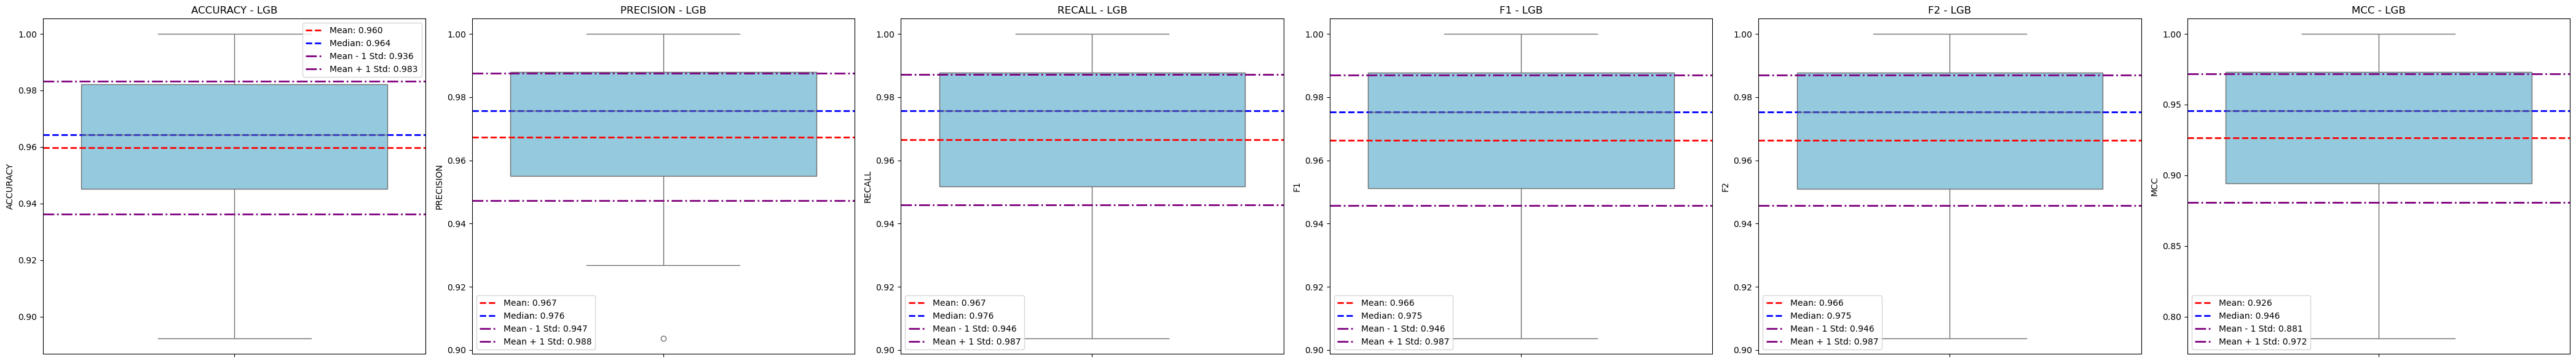

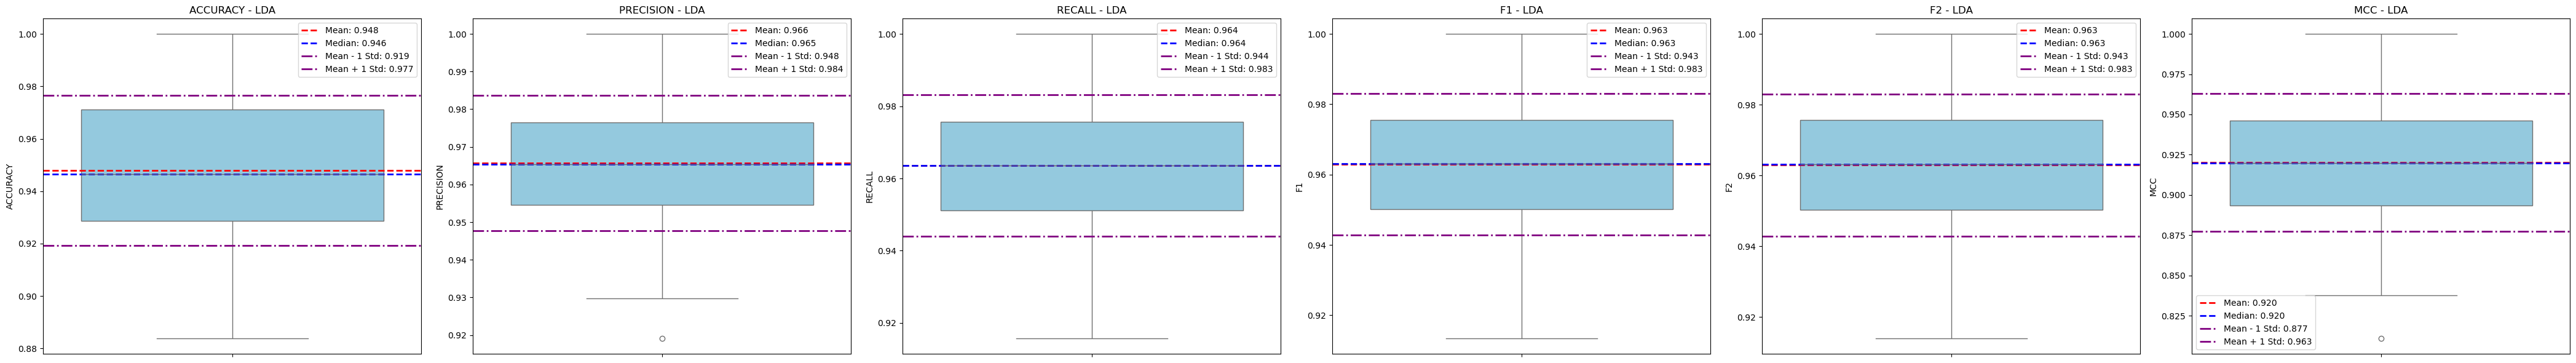

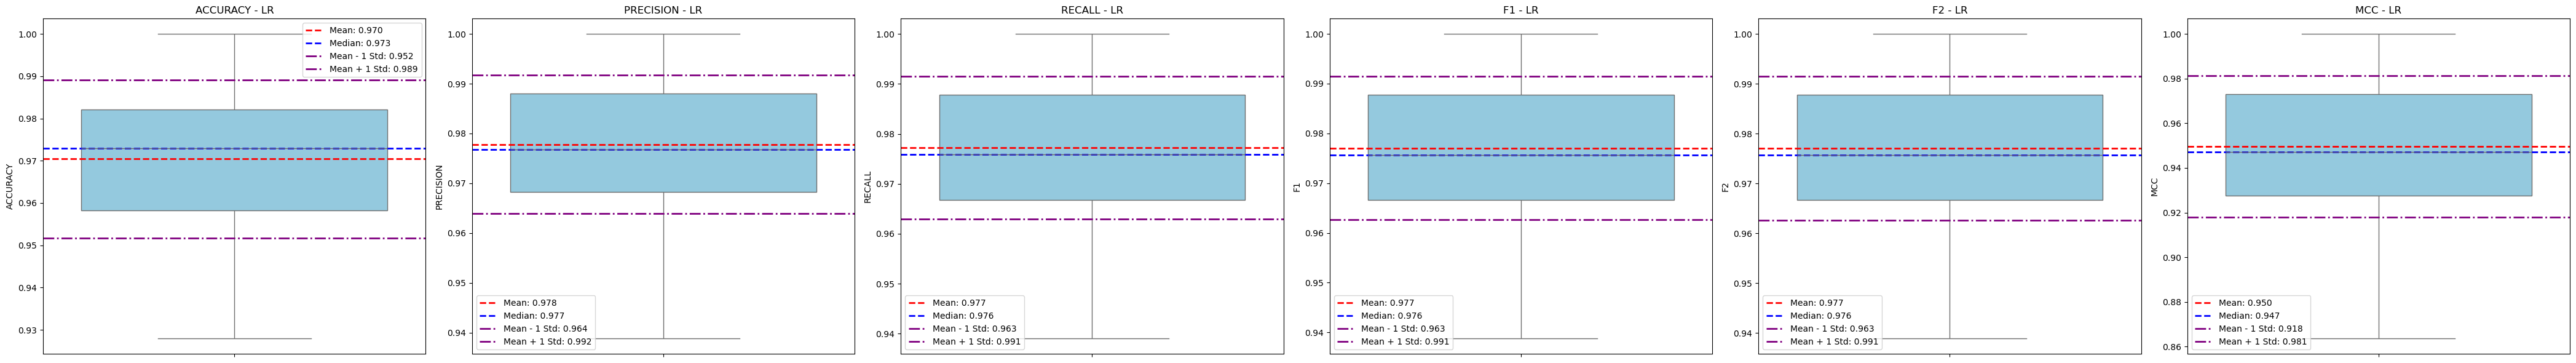

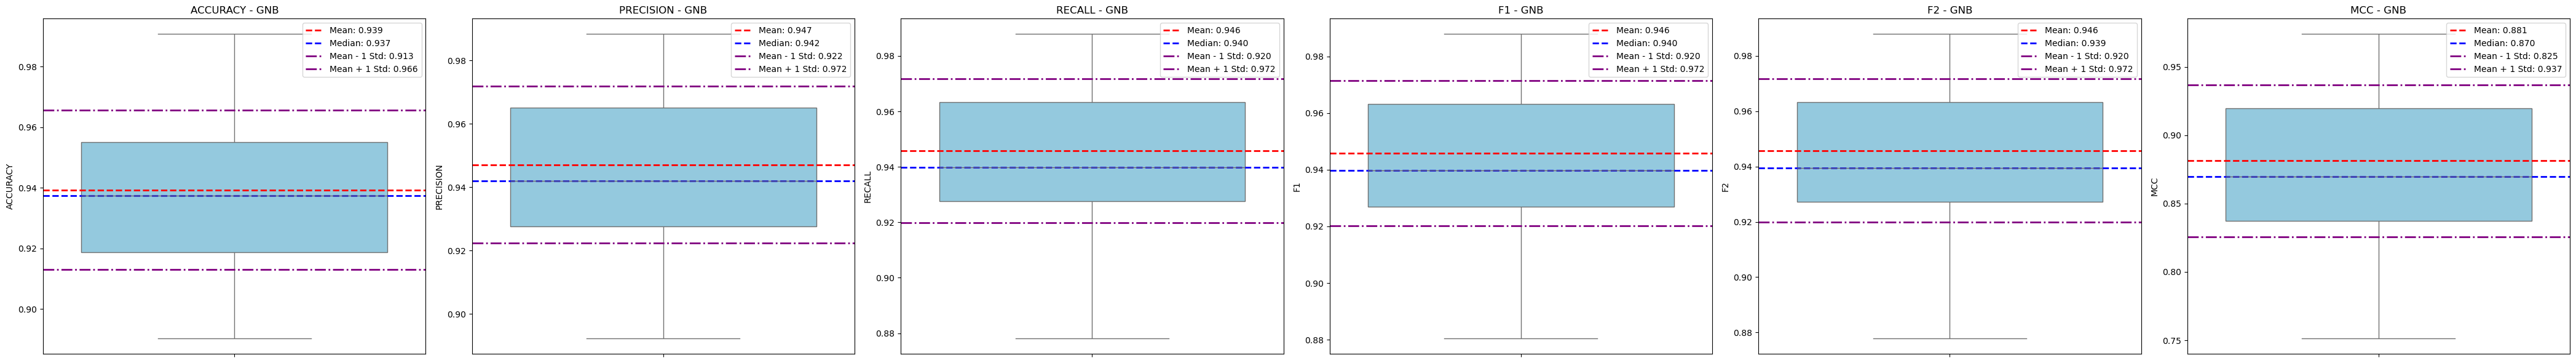

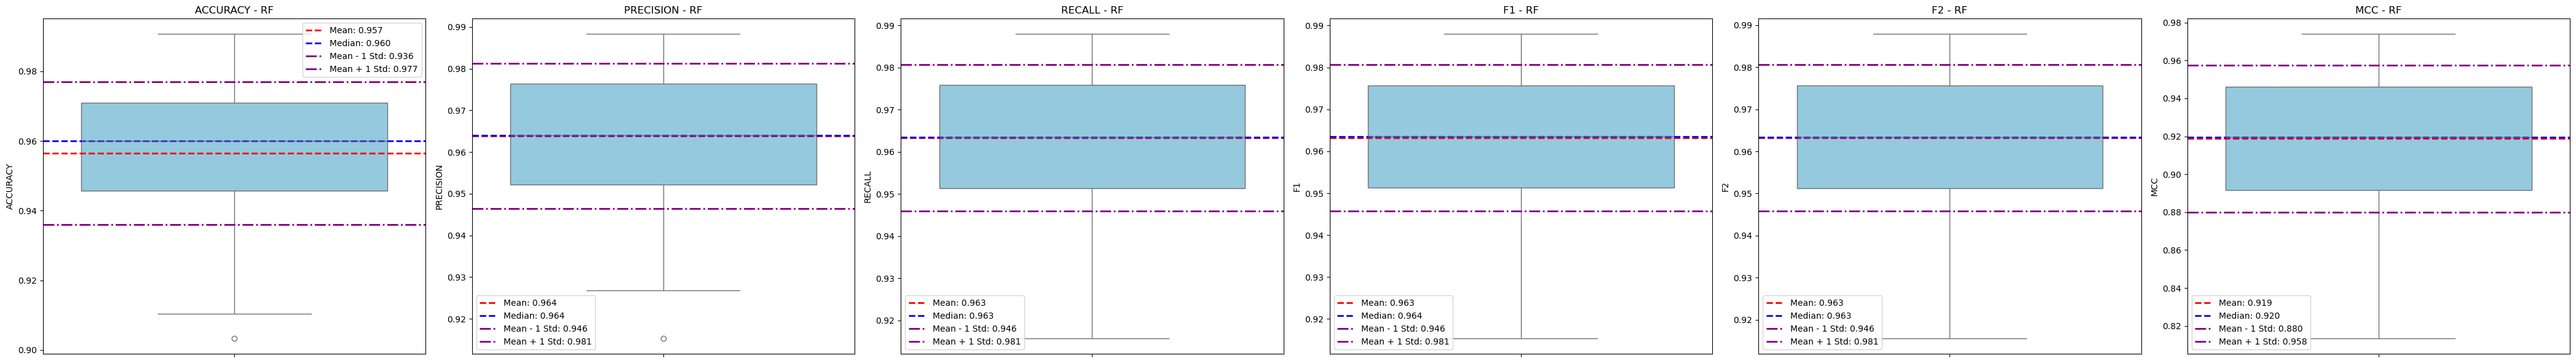

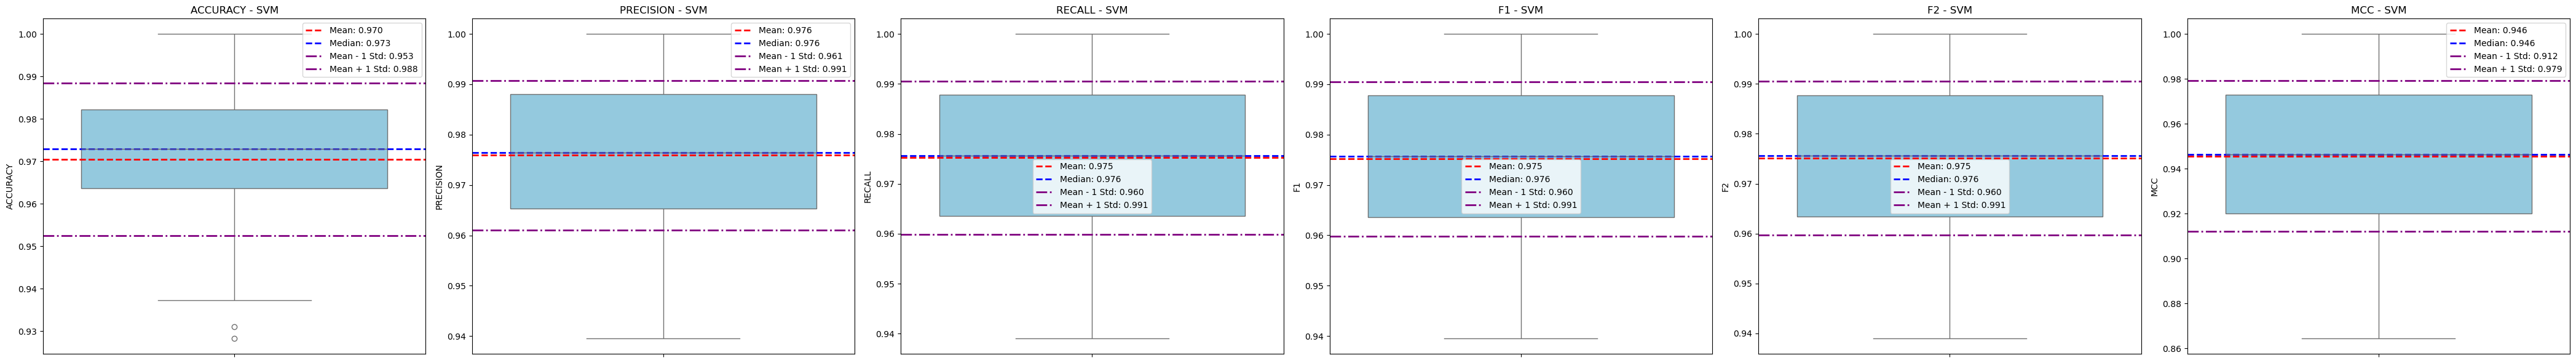

In [3]:
utils = func_classes.Utils()
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=["diagnosis"]),
    y=train_df["diagnosis"],
    models = ["LGB", "LDA", "LR", "GNB", "RF", "SVM"],
    fs=False
)
rncv.baseline_run()
results = rncv.get_baseline_results()
inner_cv_results = rncv.get_best_from_inner_cv()
results.to_csv(root/'data'/'results.csv', index=False)
inner_cv_results.to_csv(root/'data'/'inner_cv_results.csv', index=False)

# Get the best model from the inner CV results
utils.get_best_from_folds(results=root/'data'/'inner_cv_results.csv')

# Define the metrics you want to visualize
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]

# Create boxplots for each model
for model in ["LGB", "LDA", "LR", "GNB", "RF", "SVM"]:
    utils.create_boxplot(
        df=results,
        model_name=model,
        metrics=metrics
    )


Processing fold: 0
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (329, 11)
Train set size: 264
Test set size: 65
-------------------------------------
Memory: 29.08 kB
Scaled: False
Outlier values: 41 (1.4%)


Training ========================= >>
Models: LGB, LDA, LR, GNB, RF, SVM
Metric: fbeta_score


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 1.0
Test evaluation --> fbeta_score: 0.9379
Time elapsed: 0.301s
-------------------------------------------------
Time: 0.301s


Results for LinearDiscriminantAnalysis:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9809
Test evaluation --> fbeta_score: 0.9368
Time elapsed: 0.011s
-------------------------------------------------
Time: 0.011s


Results for LogisticRegression:
Fit ---------------------------------------

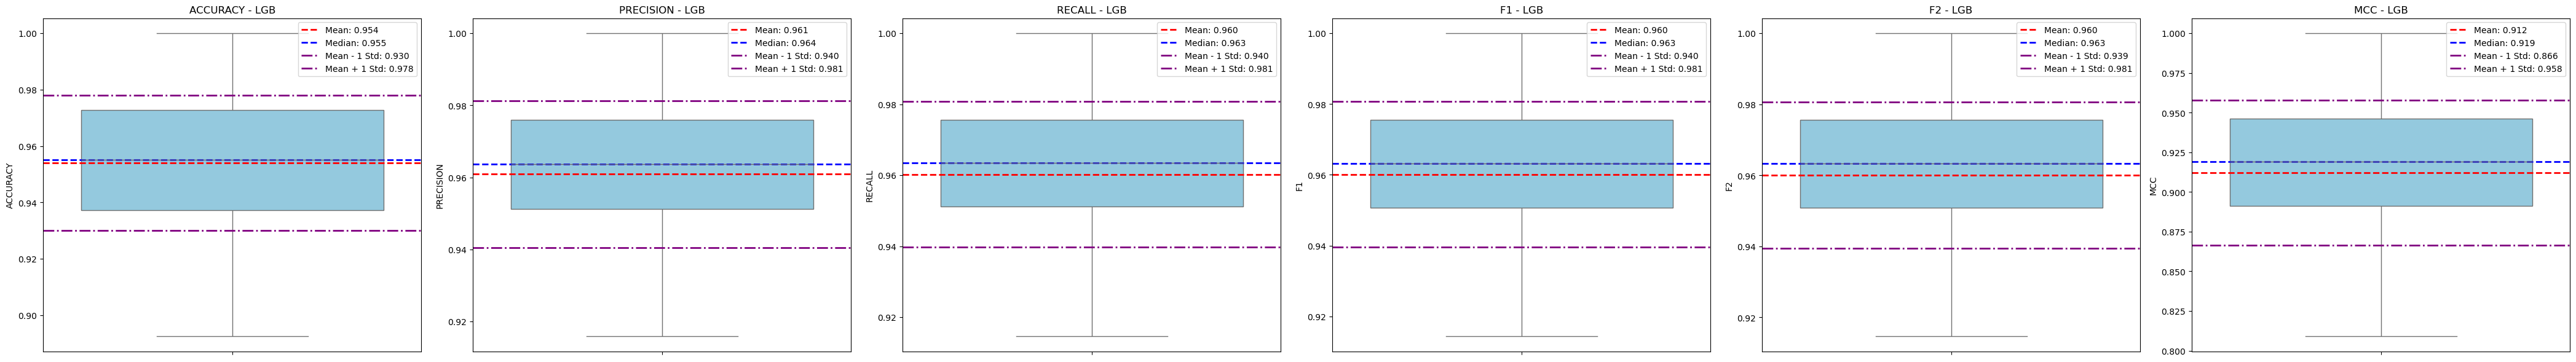

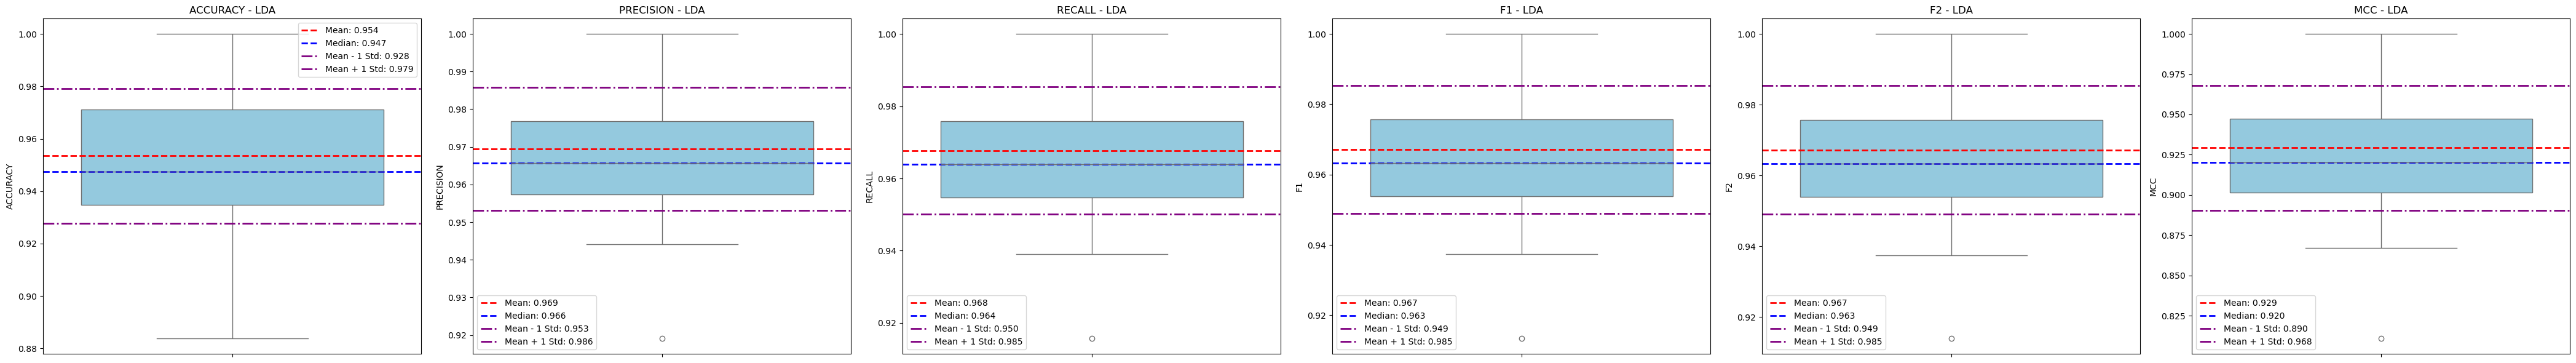

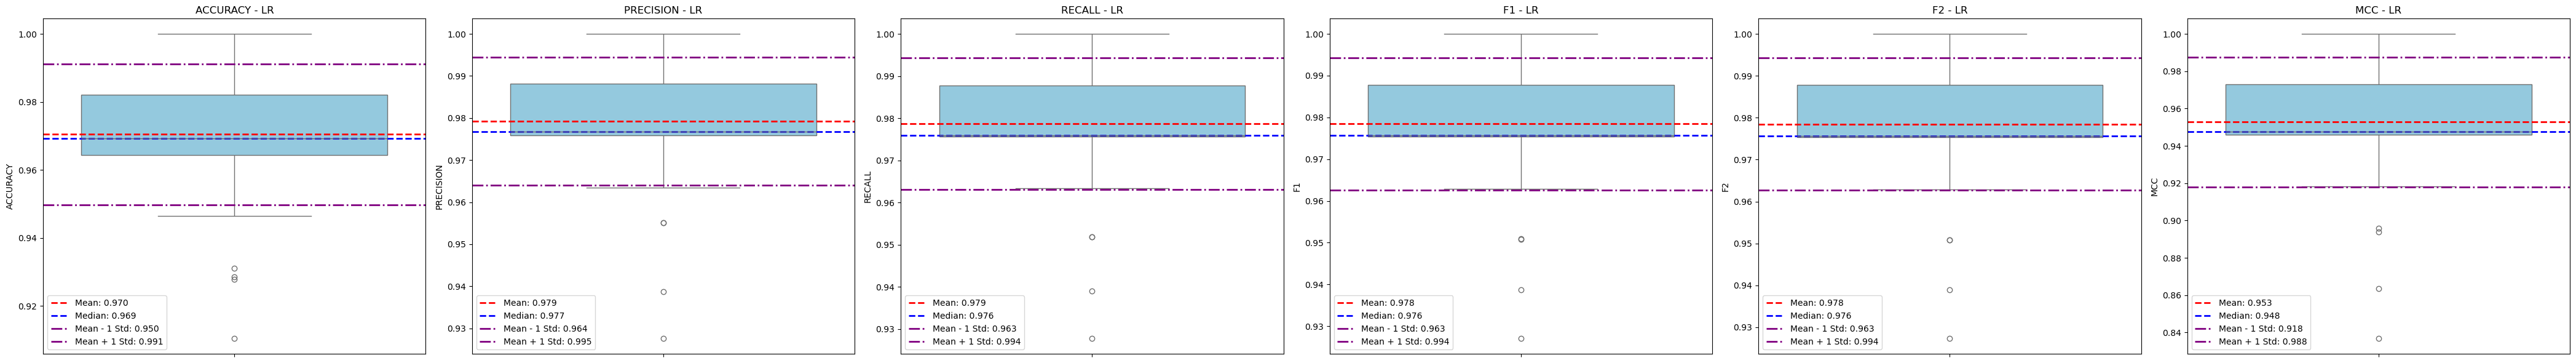

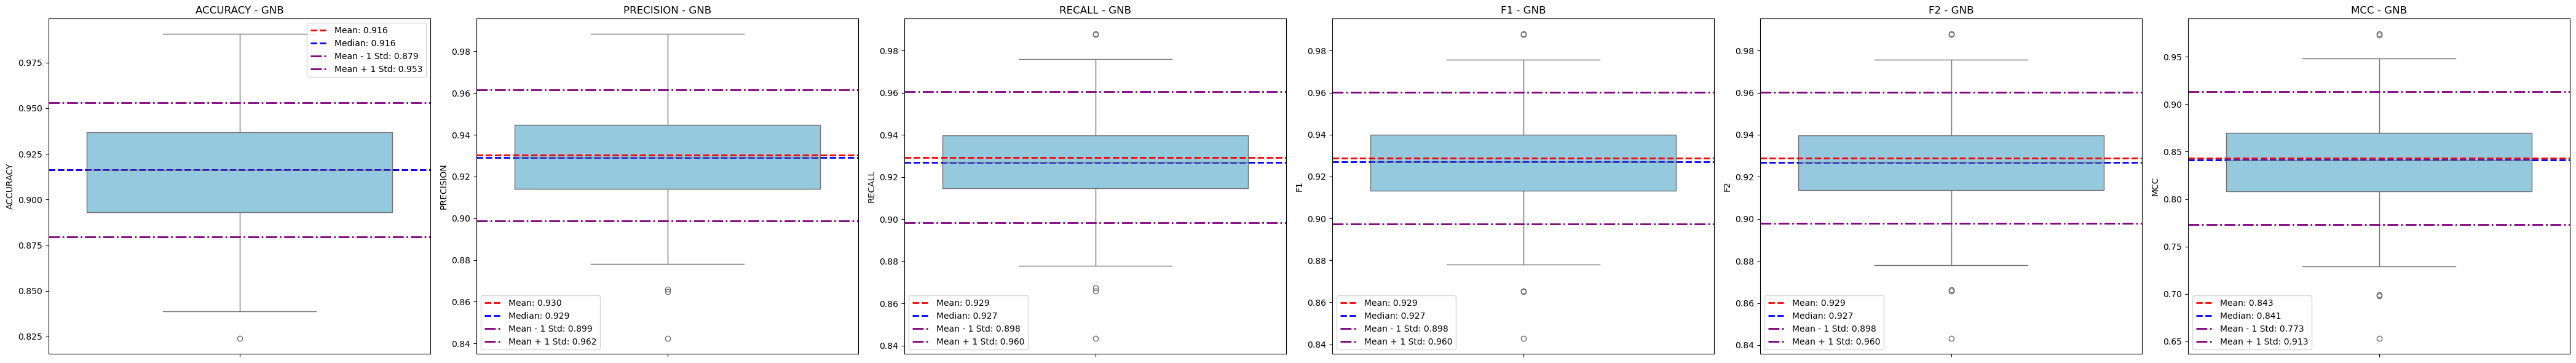

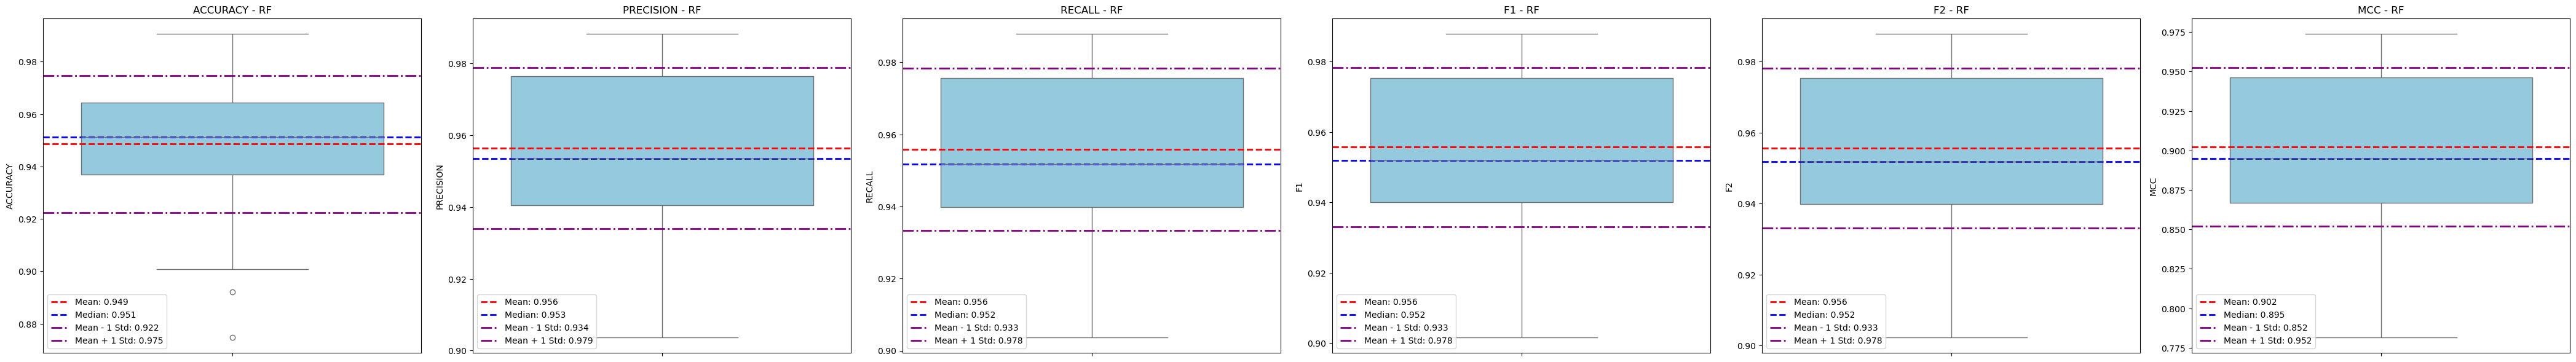

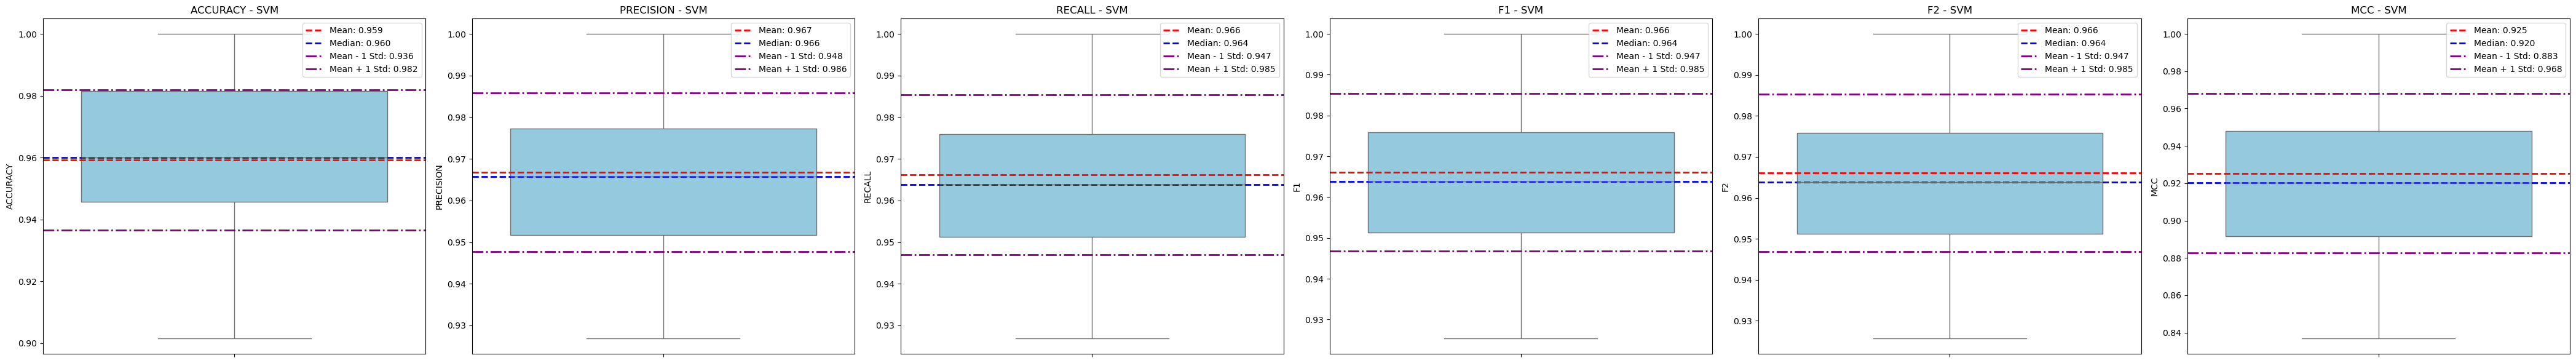

In [4]:
utils = func_classes.Utils()
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=["diagnosis"]),
    y=train_df["diagnosis"],
    models = ["LGB", "LDA", "LR", "GNB", "RF", "SVM"],
    fs=True
)
rncv.baseline_run()
results = rncv.get_baseline_results()
inner_cv_results = rncv.get_best_from_inner_cv()
results.to_csv(root/'data'/'results_PCA_10.csv', index=False)
inner_cv_results.to_csv(root/'data'/'inner_cv_results_PCA_10.csv', index=False)

# Get the best model from the inner CV results
utils.get_best_from_folds(results=root/'data'/'inner_cv_results_PCA_10.csv')

# Define the metrics you want to visualize
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]

# Create boxplots for each model
for model in ["LGB", "LDA", "LR", "GNB", "RF", "SVM"]:
    utils.create_boxplot(
        df=results,
        model_name=model,
        metrics=metrics
    )

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (412, 31)
Train set size: 330
Test set size: 82
-------------------------------------
Memory: 102.31 kB
Scaled: False
Outlier values: 128 (1.3%)


Training ========================= >>
Models: LGB, LDA, LR, GNB, RF, SVM
Metric: fbeta_score


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 1.0
Test evaluation --> fbeta_score: 0.9383
Time elapsed: 0.303s
-------------------------------------------------
Time: 0.303s


Results for LinearDiscriminantAnalysis:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9786
Test evaluation --> fbeta_score: 0.9374
Time elapsed: 0.013s
-------------------------------------------------
Time: 0.013s


Results for LogisticRegression:
Fit ---------------------------------------------
Train eval

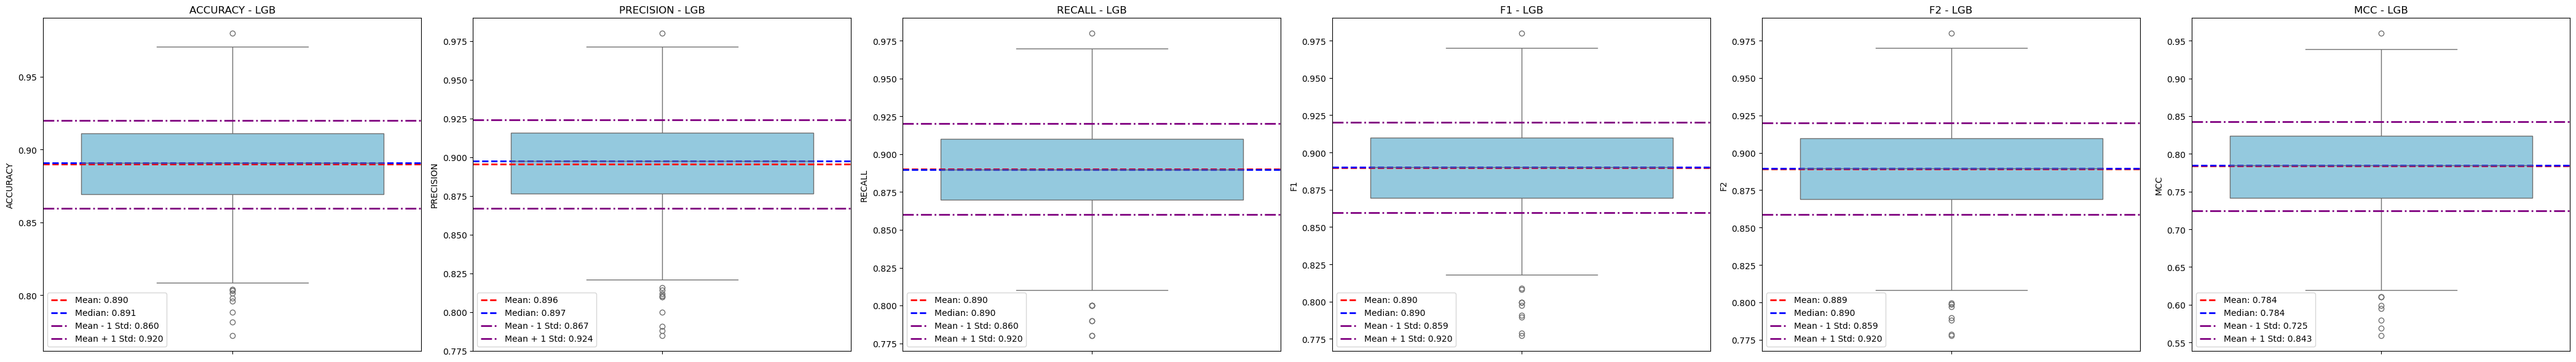

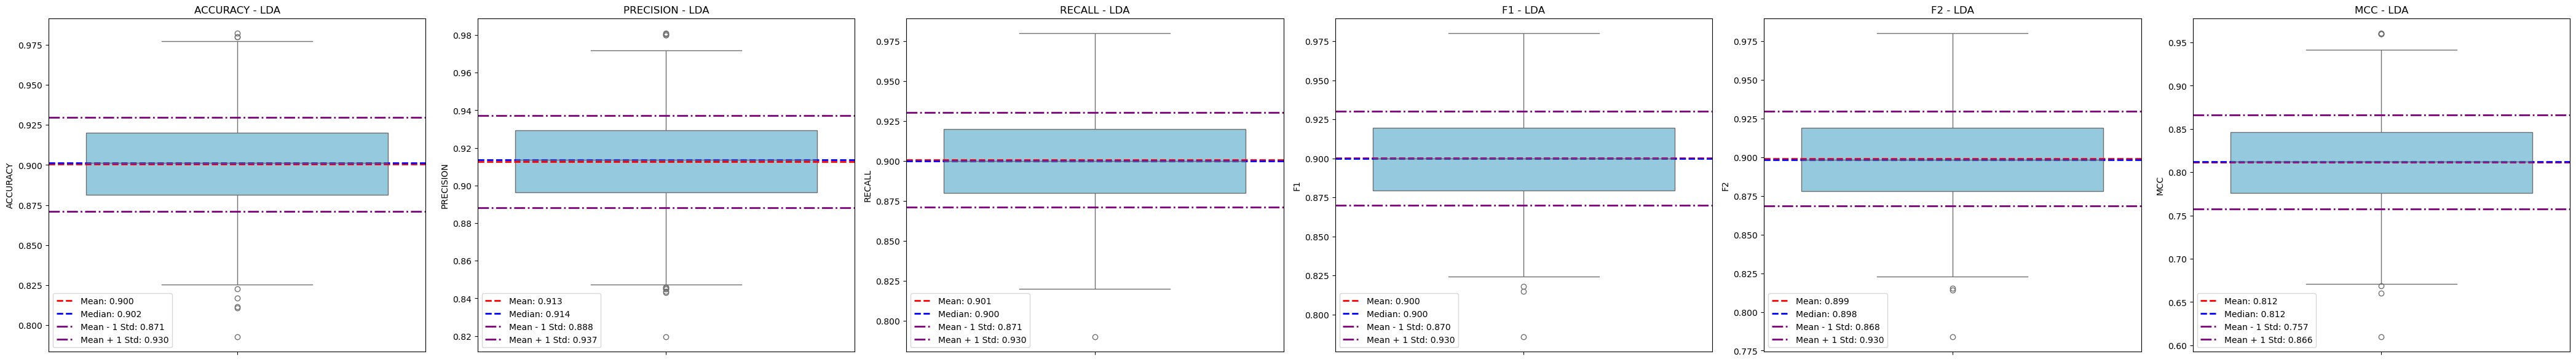

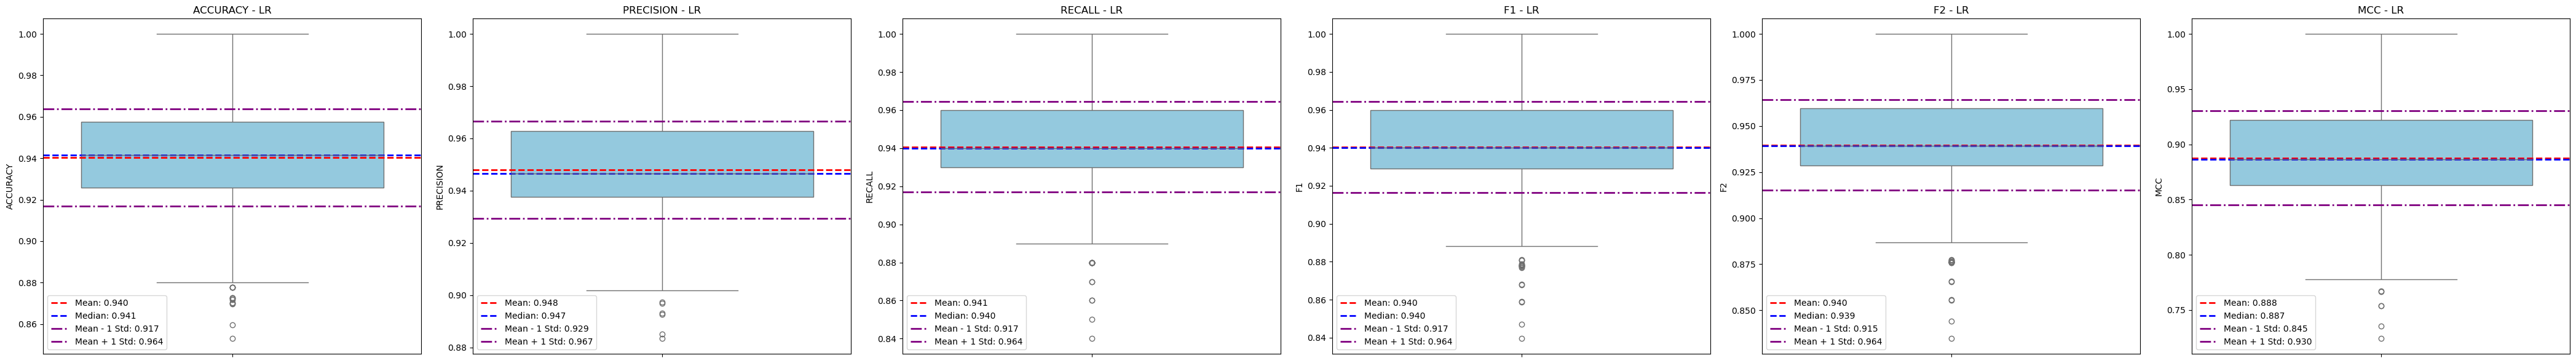

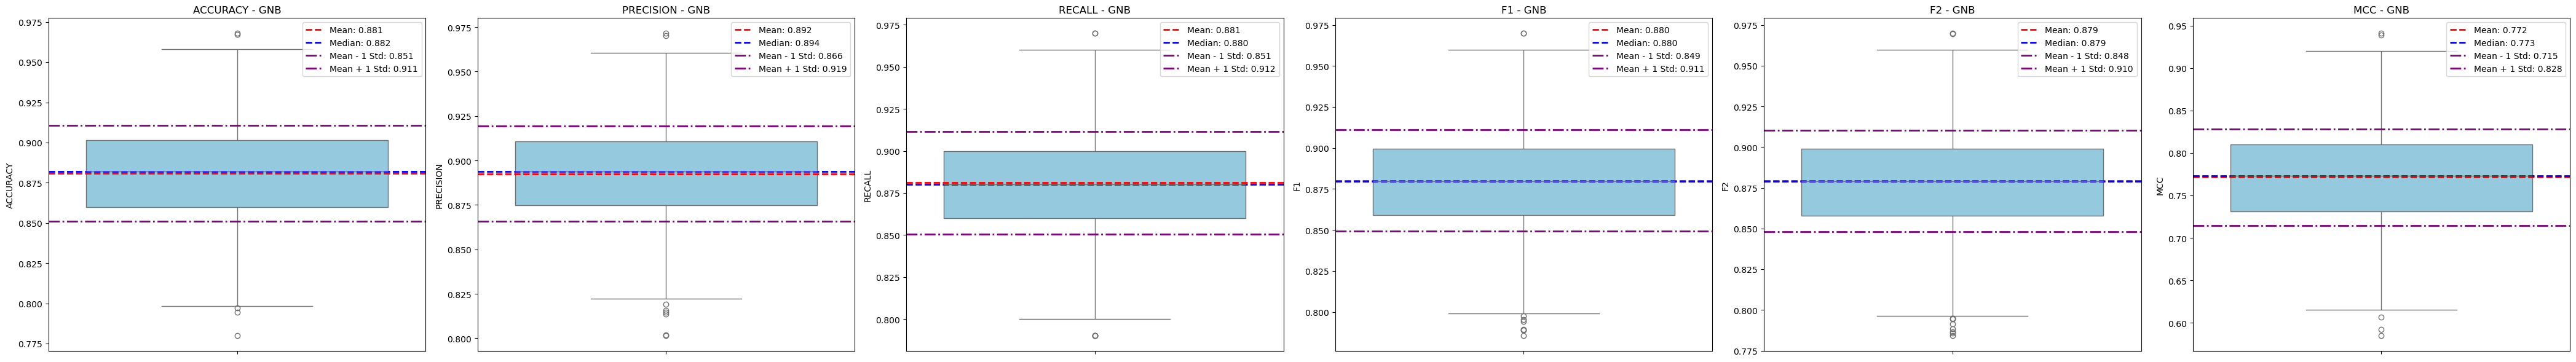

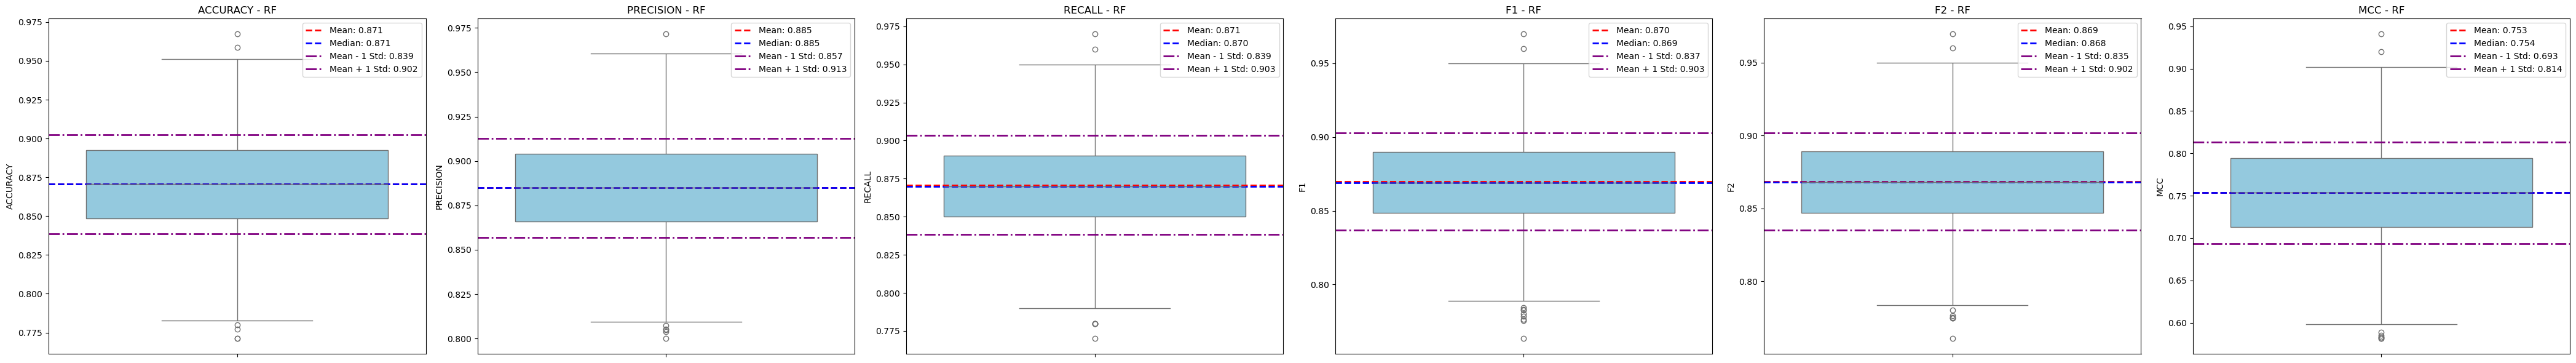

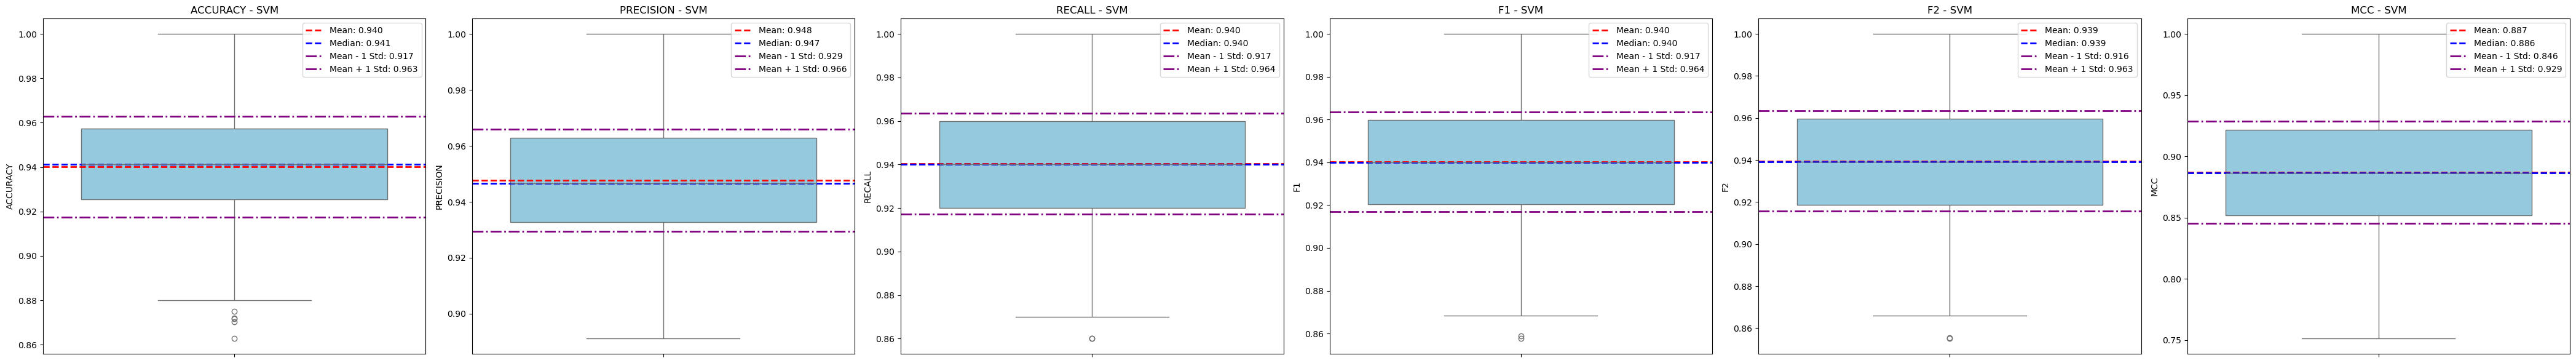

In [4]:
# Define the models you want to evaluate
models = ["LGB", "LDA", "LR", "GNB", "RF", "SVM"]

# Define the metrics you want to evaluate
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]

# Create a new RNcvAtom instance
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=["diagnosis"]),
    y=train_df["diagnosis"],
    models=models,
    fs=False
)
rncv.bootstrap(train_set=train_df, eval_set=test_df)
results = rncv.get_bootstrap_results()
results.to_csv(root/'data'/'bootstrap_results.csv', index=False)

utils = func_classes.Utils()
for model in models:
    utils.create_boxplot(
        df=results,
        model_name=model,
        metrics=metrics
    )

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (412, 11)
Train set size: 330
Test set size: 82
-------------------------------------
Memory: 36.39 kB
Scaled: False
Outlier values: 34 (0.9%)


Training ========================= >>
Models: LGB, LDA, LR, GNB, RF, SVM
Metric: fbeta_score


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 1.0
Test evaluation --> fbeta_score: 0.9629
Time elapsed: 0.300s
-------------------------------------------------
Time: 0.300s


Results for LinearDiscriminantAnalysis:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9817
Test evaluation --> fbeta_score: 0.9374
Time elapsed: 0.013s
-------------------------------------------------
Time: 0.013s


Results for LogisticRegression:
Fit ---------------------------------------------
Train evalua

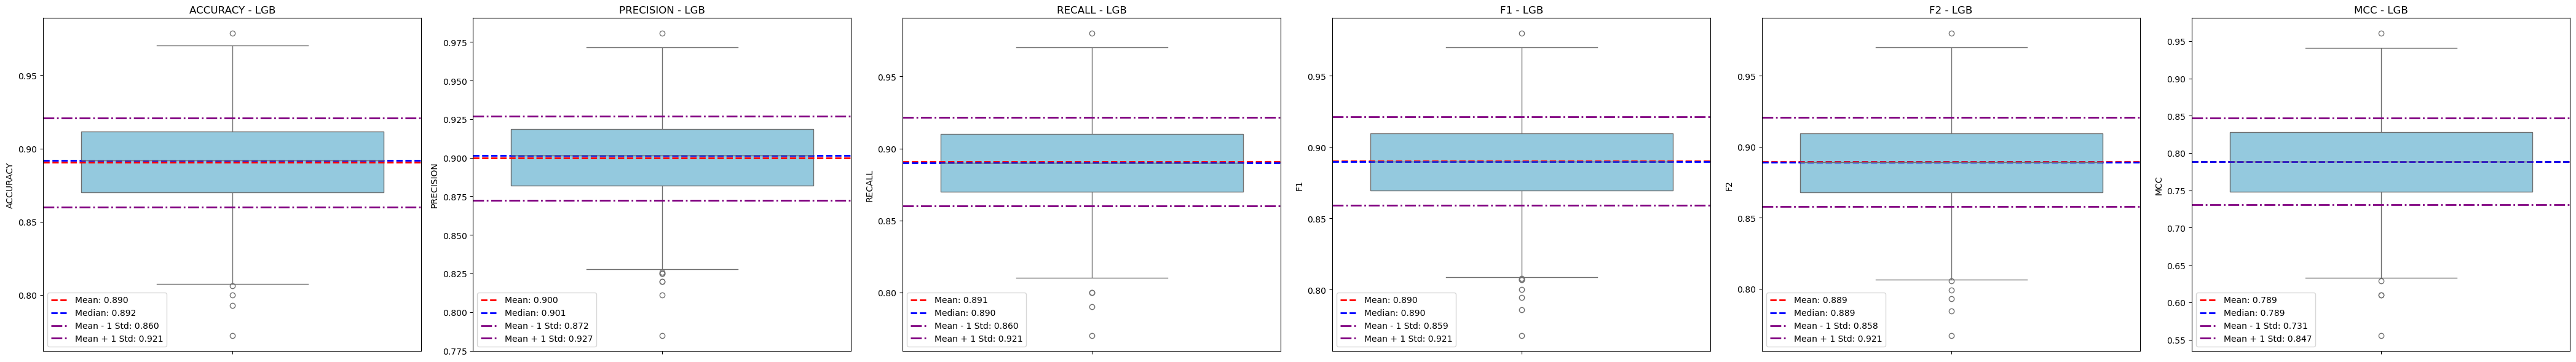

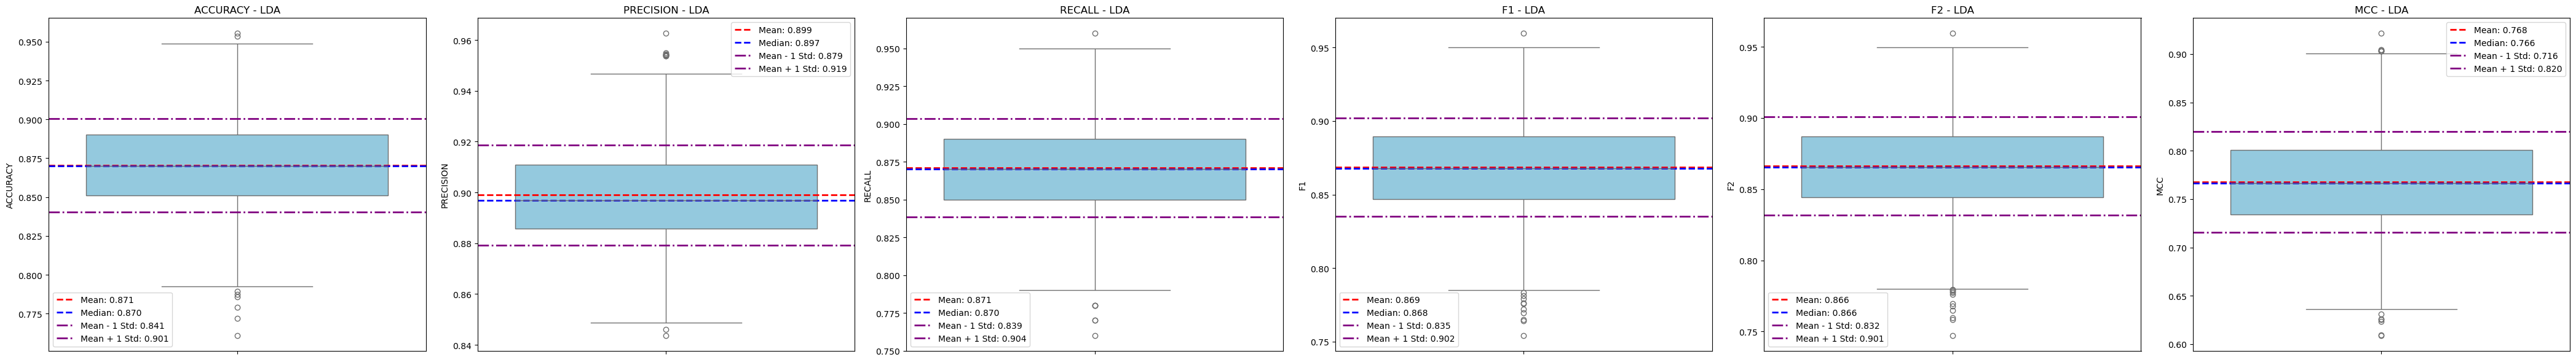

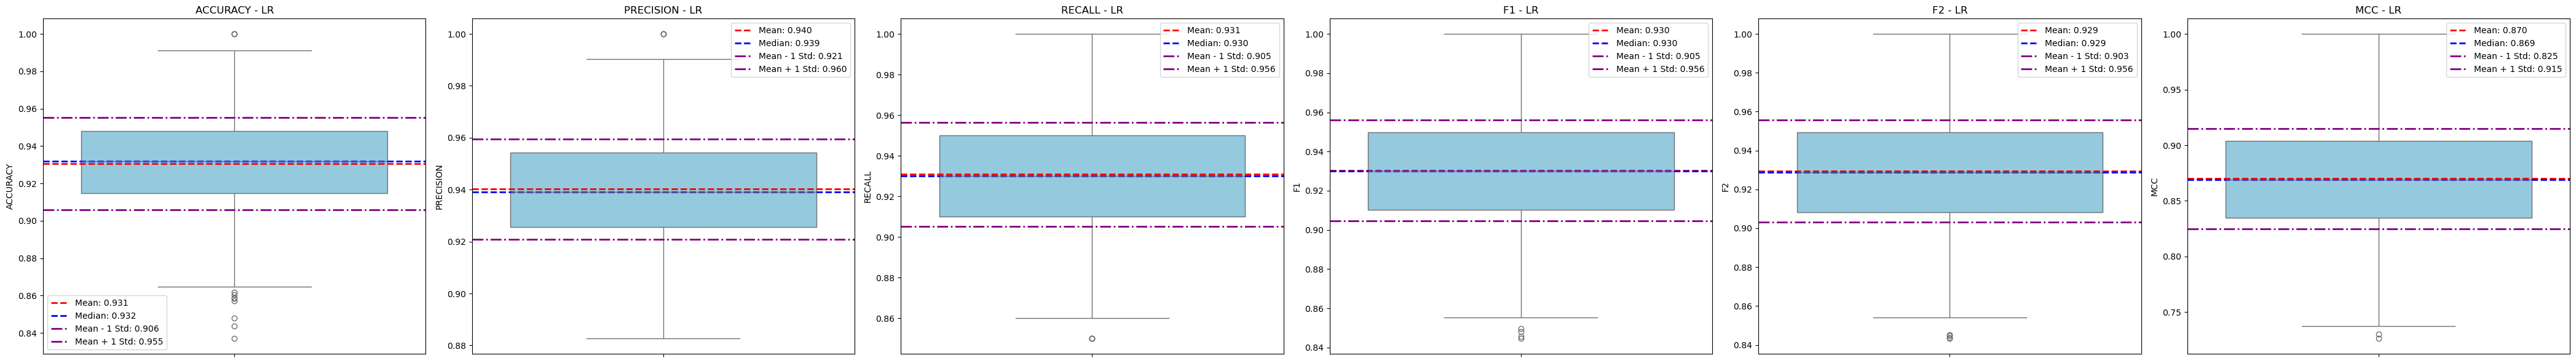

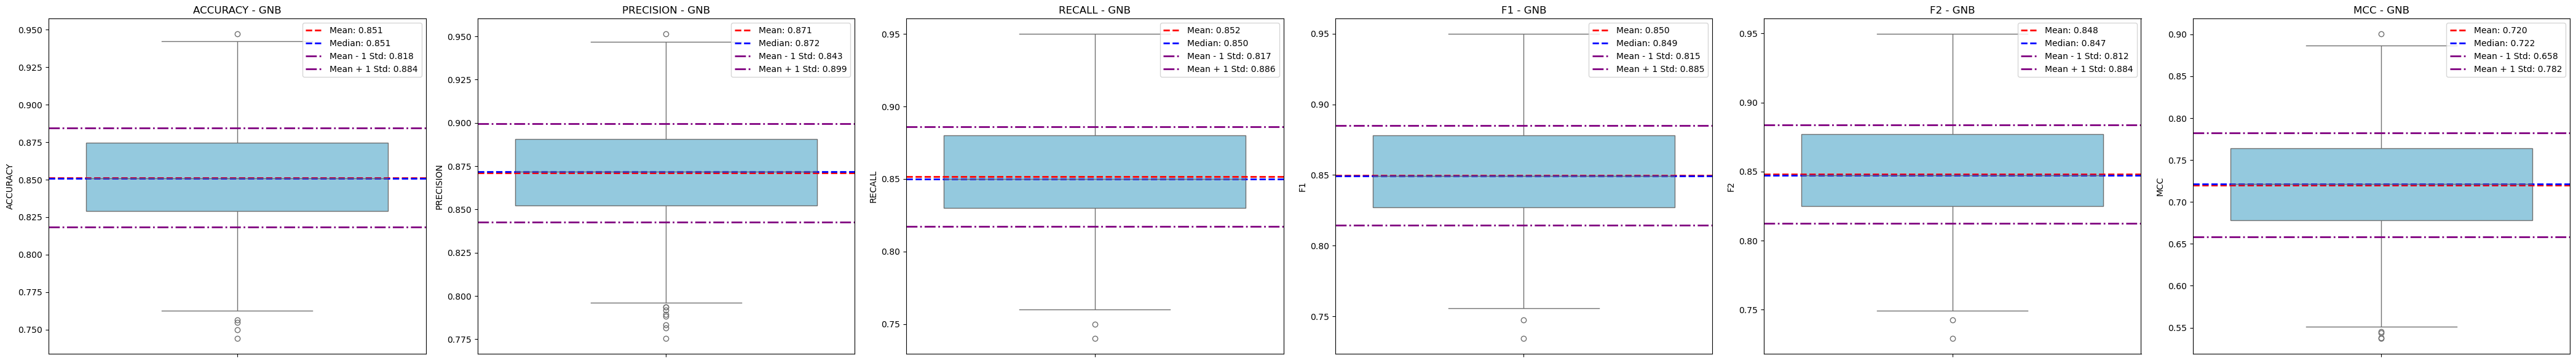

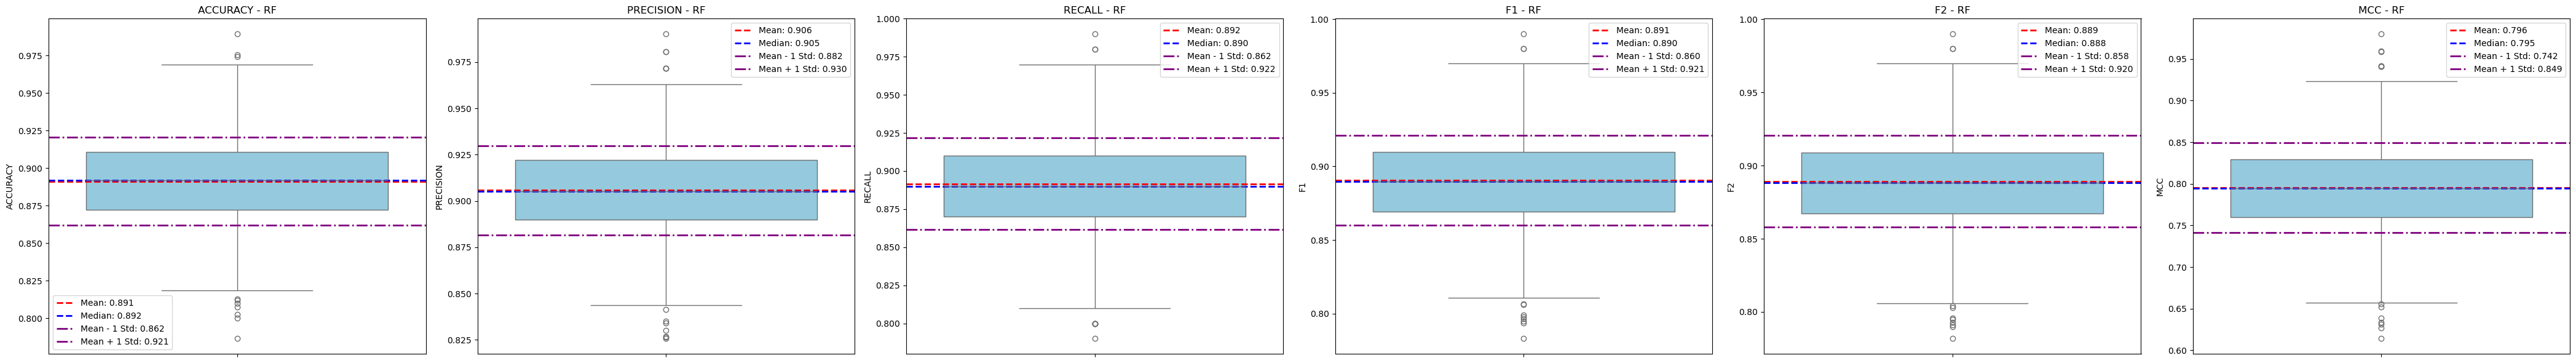

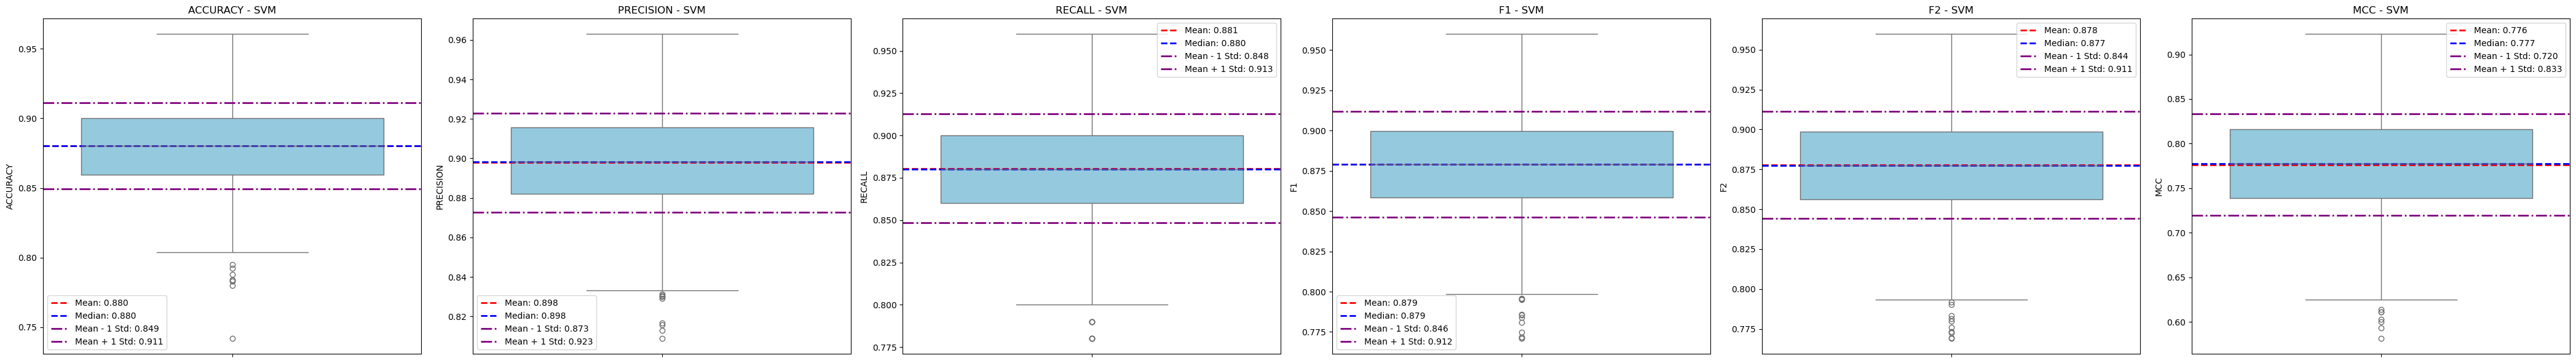

In [5]:
# Create a new RNcvAtom instance
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=["diagnosis"]),
    y=train_df["diagnosis"],
    models=models,
    fs=True
)
rncv.bootstrap(train_set=train_df, eval_set=test_df)
results = rncv.get_bootstrap_results()
results.to_csv(root/'data'/'bootstrap_results_PCA_10.csv', index=False)

utils = func_classes.Utils()
for model in models:
    utils.create_boxplot(
        df=results,
        model_name=model,
        metrics=metrics
    )

Processing fold: 0
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (329, 11)
Train set size: 264
Test set size: 65
-------------------------------------
Memory: 29.08 kB
Scaled: False
Outlier values: 41 (1.4%)


Training ========================= >>
Models: LR
Metric: fbeta_score


Running hyperparameter tuning for LogisticRegression...
| trial | penalty |       C |  solver | max_iter | l1_ratio | fbeta_score | best_fbeta_score | time_trial | time_ht |    state |
| ----- | ------- | ------- | ------- | -------- | -------- | ----------- | ---------------- | ---------- | ------- | -------- |
| 0     |      l1 |   0.006 | libli.. |      110 |      1.0 |      0.5973 |           0.5973 |     0.062s |  0.062s | COMPLETE |


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.



| 1     |    None |  0.0332 |     sag |      360 |      0.4 |      0.9696 |           0.9696 |     0.088s |  0.150s | COMPLETE |
| 2     |      l1 |  0.9164 |    saga |      970 |      0.8 |       0.981 |            0.981 |     0.075s |  0.225s | COMPLETE |
| 3     |      l2 |  0.0041 | libli.. |      380 |      0.5 |      0.9576 |            0.981 |     0.036s |  0.262s | COMPLETE |
| 4     |      l2 | 49.8304 | libli.. |      140 |      0.3 |      0.9658 |            0.981 |     0.034s |  0.296s | COMPLETE |
| 5     |      l2 |  0.0254 |    saga |      800 |      0.2 |      0.8718 |            0.981 |     0.033s |  0.329s | COMPLETE |
| 6     |      l2 |  7.1838 |     sag |      400 |      0.0 |      0.9847 |           0.9847 |     0.044s |  0.373s | COMPLETE |
| 7     |      l2 | 27.2938 |     sag |      800 |      0.5 |      0.9696 |           0.9847 |     0.099s |  0.472s | COMPLETE |
| 8     |    None |  0.0014 |     sag |      470 |      0.8 |      0.9658 |           0.9847 |   

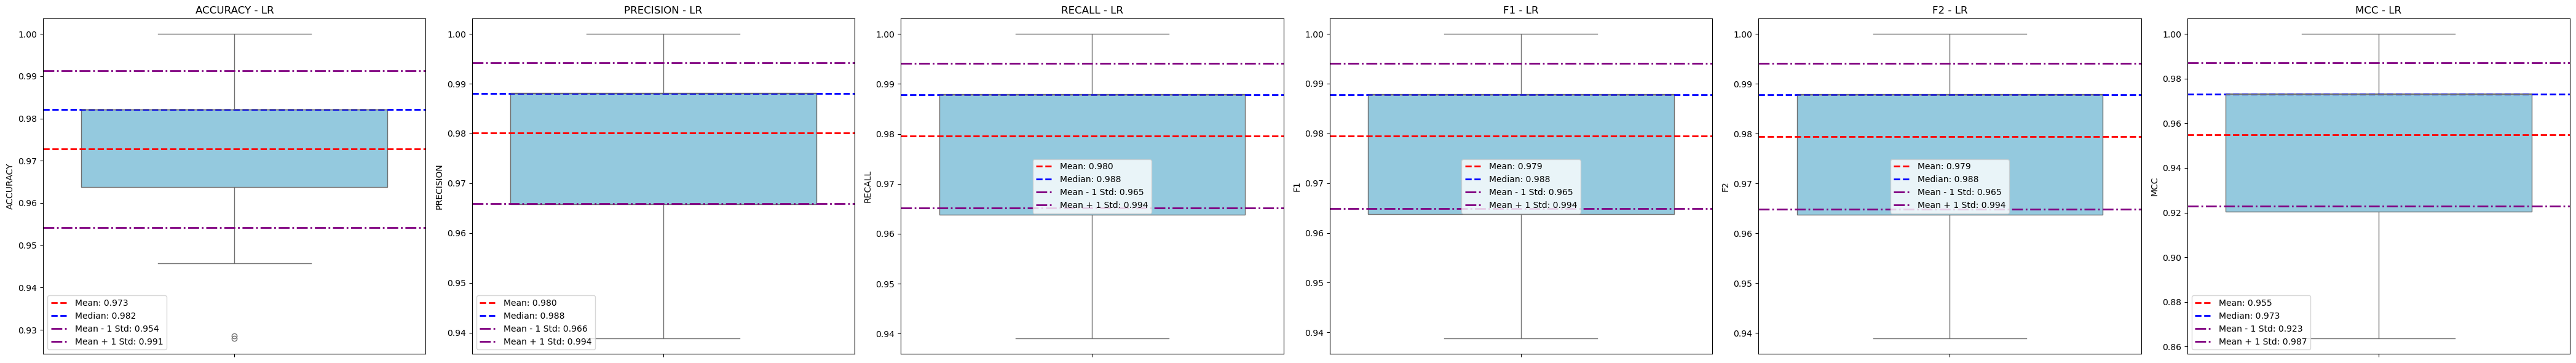

In [4]:
# Define the models you want to evaluate
models = ['LR']

# Define the metrics you want to evaluate
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]

# Create a new RNcvAtom instance
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=["diagnosis"]),
    y=train_df["diagnosis"],
    models=models,
    fs=True
)

rncv.fine_tune(model=['LR'])
best_results = rncv.get_best_model_results()
best_results.to_csv(root/'data'/'best_model_results_PCA_10.csv', index=False)
utils = func_classes.Utils()
for model in models:
    utils.create_boxplot(
        df=best_results,
        model_name=model,
        metrics=metrics
    )